## Ratio map of annual and semiannual oscillations from the Mean Seasonal Cycle (MSC)


### A regional Earth system data lab for understanding ecosystem dynamics: An example from tropical  South America
#### Paper submitted to Frontiers in Earth Science
##### Estupinan-Suarez, et al.,  correspondence to: lestup@bgc-jena.mpg.de

This scipts does the following:
- Computes the Mean Seasonal Cycle (MSC) of the first principal component from the PCA analysis. For more details about PCA analysis see PCA script.
- Imports and applies a mask based on MODIS quality flags. See mask generation script.
- Calcultes the ratio between annual and semiannual oscillation based on the Fast Fourier Spectrum

About the notebook
- It is written in Julia 1.3
- "#" comments in the code are intended to explain specific aspects of the coding
- New steps in workflows are introduced with bold headers

March 2021, Max Planck Insitute of Biogeochemistry, Jena, Germany


## Load Packages

In [1]:
using ESDL

In [2]:
using ESDLPlots

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8120720461843838036\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-17653667435598009818\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-8120720461843838036\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [3]:
using Plots

In [44]:
using FFTW

In [45]:
using Distributed

In [48]:
using CSV

In [63]:
using DelimitedFiles

## Paths for loading and saving files

## Load data

In [69]:
pathmask = ".../my_pathin/"   
pathout = ".../my_pathout/" 

".../my_pathout/"

In [42]:
pcacom = loadCube("pcacomstdTS1pc1km2014_mask") # Component 1

ZArray Cube with the following dimensions
Time                Axis with 644 Elements from 2001-01-05T00:00:00 to 2014-12-31T00:00:00
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 27.81 GB


In [47]:
plotMAP(pcacom)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Time"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 644,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
322, nothing)), Set(String[]), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/Knockout/IP1uR/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/InteractBase/9mFwe/src/../assets/all.js"), WebIO.Asset("css", nothing, "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/InteractBase/9mFwe/src/../assets/style.css"), WebIO.Asset("css", nothing, "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(WebIO.AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fdbc44c4eb0, Task (runnable) @0x00007fdbc44c4eb0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"f

In [43]:
cmsc = getMSC(pcacom)

Progress: 100%|█████████████████████████████████████████| Time: 0:05:47


ZArray Cube with the following dimensions
MSC                 Axis with 46 Elements from 1900-01-01T00:00:00 to 1900-12-27T00:00:00
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 1.99 GB


In [53]:
plotMAP(cmsc)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["MSC"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 46,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
23, nothing)), Set(String[]), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/Knockout/IP1uR/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/InteractBase/9mFwe/src/../assets/all.js"), WebIO.Asset("css", nothing, "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/InteractBase/9mFwe/src/../assets/style.css"), WebIO.Asset("css", nothing, "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(WebIO.AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fdbedf7e710, Task (runnable) @0x00007fdbedf7e710), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"form

## Load mask

In [49]:
# Load mask
maskin = CSV.read(string(pathmask, "msc_missings_mask.csv"), header=false);

In [50]:
# Convert NaNs to missings and transpose matrix
mask = map(x-> isnan(x) ? missing : x==0 ? missing : x, Matrix(maskin));
mask = mask' |> Array

2760×3360 Array{Union{Missing, Float64},2}:
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing

## Apply mask

In [51]:
function maskout(xout, xin, mask)
    xout[:] = xin.*mask
end

maskout (generic function with 1 method)

In [52]:
indims = InDims("Lon","Lat")
outdims = OutDims("Lon","Lat")

OutDims((ESDL.Cubes.Axes.ByName("Lon"), ESDL.Cubes.Axes.ByName("Lat")), (), zero, identity, :auto, false, AsArray(), :input, Zarr.NoCompressor(), "", false, 1)

In [54]:
cmscm = mapCube(maskout, cmsc, mask, indims=indims, outdims=outdims)

┌ Warning: There are still cache misses
└ @ ESDL.DAT /Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/ESDL/skMpG/src/DAT/DAT.jl:608
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
MSC                 Axis with 46 Elements from 1900-01-01T00:00:00 to 1900-12-27T00:00:00
Total size: 1.99 GB


In [55]:
plotMAP(cmscm)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["MSC"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 46,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
23, nothing)), Set(String[]), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/Knockout/IP1uR/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/InteractBase/9mFwe/src/../assets/all.js"), WebIO.Asset("css", nothing, "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/InteractBase/9mFwe/src/../assets/style.css"), WebIO.Asset("css", nothing, "/Net/Groups/BGI/scratch/lestup/julia_atacama_depots/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(WebIO.AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fdb4963bd00, Task (runnable) @0x00007fdb4963bd00), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"form

## Ratio mono & bimodality

In [56]:
## This fuction computes the ratio between the 2nd and 3rd compondent from 
## the frequency power spectrum using fftw (fft[2]/fft[3])

function spratioFx(xin)
    any(ismissing, xin) && return missing
    xfft = fft(convert(Vector{Float64}, xin))
    xout = abs(xfft[2])/abs(xfft[3])
end

spratioFx (generic function with 1 method)

In [57]:
ratiosp = mapslices(spratioFx, cmscm, dims="MSC")

Progress: 100%|█████████████████████████████████████████| Time: 0:06:46


In-Memory data cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 44.22 MB


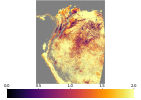

In [61]:
plotMAP(ratiosp, dmin=0, dmax=2)

In [62]:
saveCube(ratiosp, "ratio_annual_semiannual_mask")

ZArray Cube with the following dimensions
Lon                 Axis with 2760 Elements from -82.99622135 to -60.00464665
Lat                 Axis with 3360 Elements from 13.99613735 to -13.99541735
Total size: 44.22 MB


In [66]:
ratioout = map(x -> ismissing(x) ? NaN : x, (ratiosp[:,:]' |> Matrix))
writedlm(string(pathout,"ratio_annual_semiannual_mask.csv"),
    ratioout, ",")